In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils import plot_model
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Training set shape (60000, 28, 28, 1)
Testing set shape (10000, 28, 28, 1)
Training set shape (60000, 28, 28, 1)
Testing set shape (10000, 28, 28, 1)


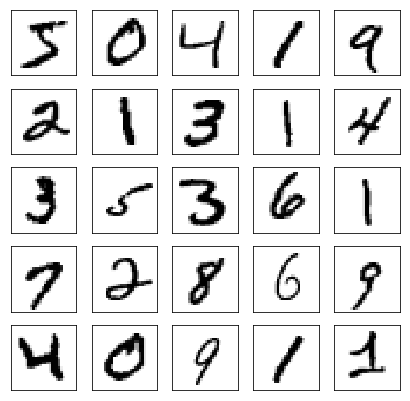

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print "X_train shape", X_train.shape
print "y_train shape", y_train.shape
print "X_test shape", X_test.shape
print "y_test shape", y_test.shape

# reshape
X_train = X_train.reshape( X_train.shape[0], X_train.shape[1], X_train.shape[2], 1 )
X_test = X_test.reshape( X_test.shape[0], X_test.shape[1], X_test.shape[2], 1 )
#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

# normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print "Training set shape", X_train.shape
print "Testing set shape", X_test.shape

# convert labels to categories
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print "Training set shape", X_train.shape
print "Testing set shape", X_test.shape

plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i,:,:,0], cmap='gray_r', interpolation='none')
    #plt.title("Class {}".format(y_train[i]))
    #plt.axis("off")
    plt.xticks([])
    plt.yticks([])

In [13]:
aug_rot = 15 #augmentation rotation in degrees
aug_shift = 0.1 #augmentation shift
aug_shear = 0.1
aug_zoom = 0.1
datagen = ImageDataGenerator(rotation_range=aug_rot, 
                             width_shift_range=aug_shift, 
                             height_shift_range=aug_shift,
                             zoom_range = aug_zoom,
                             shear_range = aug_shear)
# datagen.fit(X_train)

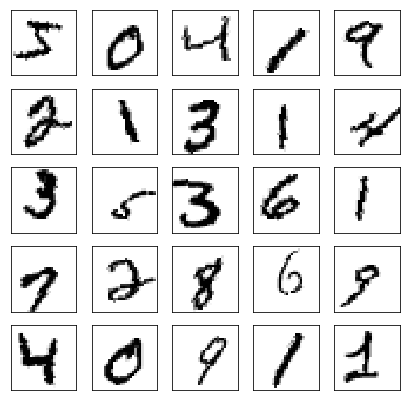

In [18]:
# let's explore the image augmentation. the plot below shows the same images as above, 
# but distorted using the augmentation parameters.

for X_batch, y_batch in datagen.flow(X_train[:25], y_train[:25], batch_size=25, shuffle=False):
    for i in range(0, 25):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray_r' )
        plt.xticks([])
        plt.yticks([])
    break